In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/otto-group-product-classification-challenge/sampleSubmission.csv
/kaggle/input/otto-group-product-classification-challenge/train.csv
/kaggle/input/otto-group-product-classification-challenge/test.csv


# Otto Group Product Classification Challenge

![](https://storage.googleapis.com/kaggle-media/competitions/kaggle/4280/media/Grafik.jpg)

* In this project, a dataset with 93 features for more than 200,000 products are given. 
* The objective is to build a predictive model which is able to distinguish between main product categories. 
* Classification algortihms will be used to classify to categories.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/kaggle/input/otto-group-product-classification-challenge/train.csv')
test = pd.read_csv('/kaggle/input/otto-group-product-classification-challenge/test.csv')
submission = pd.read_csv('/kaggle/input/otto-group-product-classification-challenge/sampleSubmission.csv')

In [4]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [6]:
train.shape,test.shape,submission.shape

((61878, 95), (144368, 94), (144368, 10))

In [7]:
submission.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [9]:
train.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

In [10]:
train.target.value_counts()

target
Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: count, dtype: int64

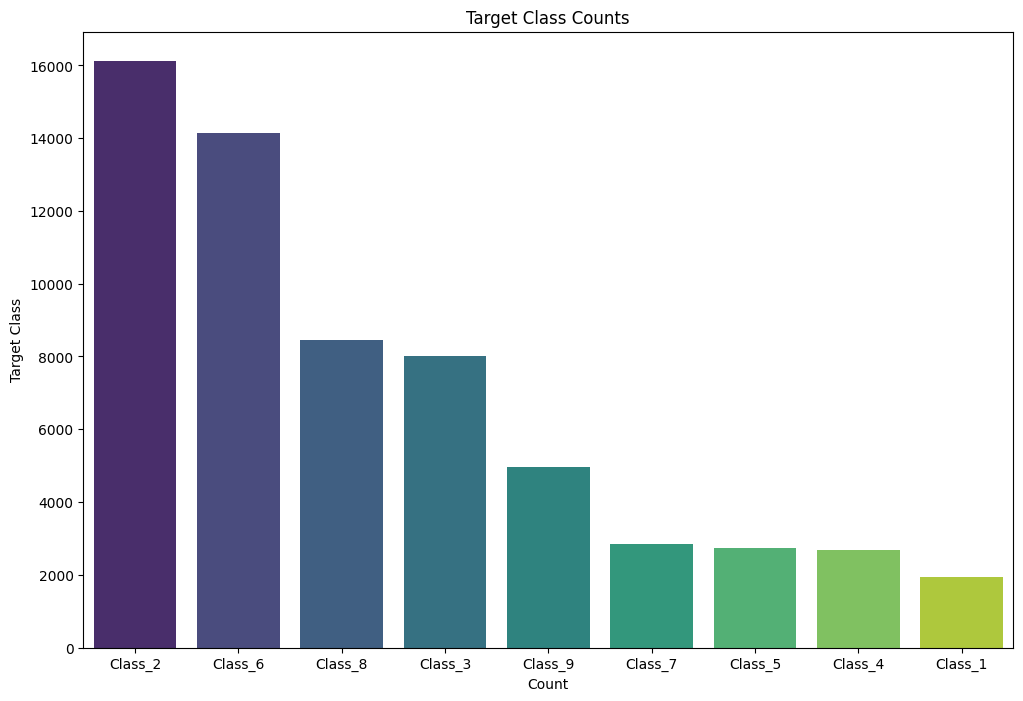

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='target', data=train, order=train['target'].value_counts().index, palette='viridis')
plt.title('Target Class Counts')
plt.xlabel('Count')
plt.ylabel('Target Class')
plt.show()


In [12]:
x = train.drop(['target','id'],axis=1)
y = train[['target']]


In [13]:
y.value_counts()

target 
Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: count, dtype: int64

## Data Augmentaiton

In [14]:
#pip install imbalanced-learn

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [16]:
y.value_counts()

target 
Class_1    16122
Class_2    16122
Class_3    16122
Class_4    16122
Class_5    16122
Class_6    16122
Class_7    16122
Class_8    16122
Class_9    16122
Name: count, dtype: int64

In [17]:
test=test.drop(['id'],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_val)
test=sc.transform(test)

In [20]:
y_train

,target
94178,Class_4
44343,Class_6
94893,Class_4
30690,Class_5
53340,Class_8
...,...
110268,Class_5
119879,Class_7
103694,Class_5
131932,Class_8


In [21]:
d = {"Class_1": 0, "Class_2": 1, "Class_3": 2, "Class_4": 3, "Class_5": 4, "Class_6": 5, "Class_7": 6, "Class_8": 7, "Class_9": 8}
y_train.target=y.target.map(d)
y_val.target=y.target.map(d)
y_train = y_train['target'].values.ravel()
y_val = y_val['target'].values.ravel()

# Model

In [22]:
def fnc_classification_all_model(x_train,x_test,y_train,y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import GradientBoostingClassifier
    from xgboost import XGBClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()

    
    algos=[g,b,KN,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]

    for item in algos:
        print(item)

        predict=item.fit(x_train,y_train).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict,average='weighted', zero_division=0))
        recall_scored.append(recall_score(y_test,predict,average='weighted'))
        f1_scored.append(f1_score(y_test,predict,average='weighted'))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)

In [23]:
fnc_classification_all_model(x_train,x_val,y_train,y_val)

GaussianNB()
BernoulliNB()
KNeighborsClassifier()
DecisionTreeClassifier()
RandomForestClassifier()
LogisticRegression()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
GradientBoostingClassifier()


,accuracy_score,f1_score,recall_score,precision_score
KNeighborsClassifier,0.674569,0.675130,0.674569,0.691771
XGBClassifier,0.650000,0.641450,0.650000,0.728465
LogisticRegression,0.634976,0.616039,0.634976,0.736220
BernoulliNB,0.576017,0.574929,0.576017,0.580837
GaussianNB,0.571813,0.555328,0.571813,0.674378
GradientBoostingClassifier,0.565507,0.530721,0.565507,0.716175
RandomForestClassifier,0.529428,0.482662,0.529428,0.718629
DecisionTreeClassifier,0.319986,0.302063,0.319986,0.333128


# Deep Learning

In [24]:
x_train=pd.DataFrame(x_train)
x_train.shape,y_train.shape

((116078, 93), (116078,))

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall


model = Sequential([
Dense(128, activation='relu', input_shape=(93,)),
#BatchNormalization(),
Dropout(0.5),
Dense(200, activation='relu'),
#BatchNormalization(),
Dropout(0.5),
Dense(300, activation='relu'),
#BatchNormalization(),
Dense(400, activation='relu'),
BatchNormalization(),
Dense(250, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(100, activation='relu'),
Dense(9, activation='softmax')
    ])
    
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')

# Fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=256,validation_data=(x_val,y_val), callbacks=[early_stopping, reduce_lr])#validation_split=0.2


Epoch 1/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2211 - loss: 2.3108 - val_accuracy: 0.5986 - val_loss: 1.0341 - learning_rate: 0.0100
Epoch 2/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4596 - loss: 1.4301 - val_accuracy: 0.6225 - val_loss: 1.0253 - learning_rate: 0.0100
Epoch 3/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5386 - loss: 1.1922 - val_accuracy: 0.6429 - val_loss: 0.9922 - learning_rate: 0.0100
Epoch 4/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5777 - loss: 1.0806 - val_accuracy: 0.6599 - val_loss: 0.9563 - learning_rate: 0.0100
Epoch 5/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6007 - loss: 1.0185 - val_accuracy: 0.6644 - val_loss: 0.9387 - learning_rate: 0.0100
Epoch 6/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6183 - loss: 0.9729 - val_accuracy: 0.6750 - val_loss: 0.9086 - learning_rate: 0.0100
Epoch 7/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6283 - loss: 

In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
precision = precision_score(y_val, y_pred_classes, average='macro') # 'macro' average calculates metrics for each label, and find their unweighted mean
recall = recall_score(y_val, y_pred_classes, average='macro')
accuracy = accuracy_score(y_val, y_pred_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')


907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.7399397242600108
Recall: 0.7184819017806414
Accuracy: 0.7191936595451413


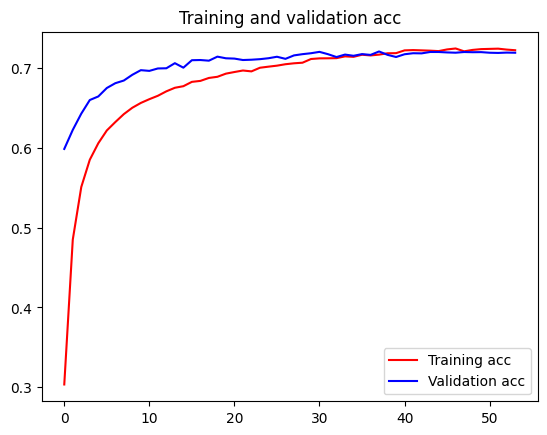

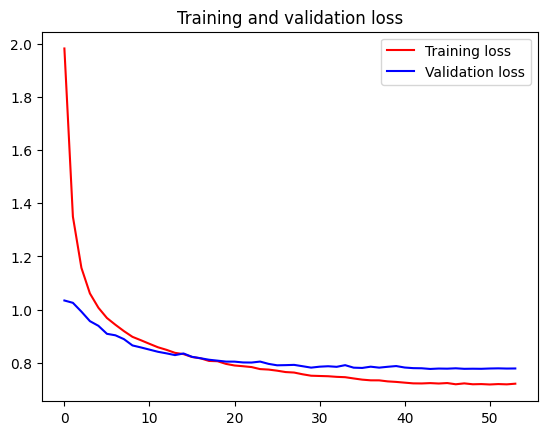

<Figure size 640x480 with 0 Axes>

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']

val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.show()

The performanc of the Deep learning model is better than classificaiton algorithms.

In [47]:
y_pred=model.predict(test)

4512/4512 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [48]:
import pandas as pd
import numpy as np

column_names = [f"Class_{i+1}" for i in range(9)] 

y_pred_df = pd.DataFrame(y_pred, columns=column_names)

y_pred_df = y_pred_df.round(1)

y_pred_df.head()


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.0,0.1,0.3,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.7,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.6,0.2,0.1,0.0,0.0,0.0,0.0,0.0
4,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [49]:
import pandas as pd
import numpy as np


id_column = submission.id
y_pred_df.insert(0, 'id', id_column)

In [50]:
y_pred_df.tail()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
144363,144364,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144364,144365,0.0,0.1,0.4,0.4,0.0,0.0,0.1,0.0,0.0
144365,144366,0.0,0.1,0.6,0.3,0.0,0.0,0.0,0.0,0.0
144366,144367,0.0,0.2,0.3,0.6,0.0,0.0,0.0,0.0,0.0
144367,144368,0.0,0.2,0.4,0.2,0.0,0.0,0.2,0.0,0.0


In [51]:
y_pred_df.to_csv('sonucOTTO2.csv', index=False)

* The objective of this project is to build a predictive model which is able to distinguish between main product categories.
* There are 9 class in the data and they are imbalanced. By using Smote as a data augmentation technique, this problem is eliminated.
* Classification algortihms is used to classify to categories. 
* Best algorithm is BernoulliNB during training phase. And By using BernoulliNB test data is classified.